In [1]:
import sqlite3
import pandas as pd

# Create in-memory SQLite DB
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()


In [5]:
# Regions Table
cursor.execute('''
CREATE TABLE Regions (
    region_id INTEGER PRIMARY KEY,
    region_name TEXT
)
''')

# Categories Table
cursor.execute('''
CREATE TABLE Categories (
    category_id INTEGER PRIMARY KEY,
    category_name TEXT
)
''')

# Customers Table
cursor.execute('''
CREATE TABLE Customers (
    customer_id INTEGER PRIMARY KEY,
    name TEXT,
    email TEXT,
    country TEXT,
    region_id INTEGER,
    FOREIGN KEY(region_id) REFERENCES Regions(region_id)
)
''')

# Products Table
cursor.execute('''
CREATE TABLE Products (
    product_id INTEGER PRIMARY KEY,
    name TEXT,
    category_id INTEGER,
    price REAL,
    FOREIGN KEY(category_id) REFERENCES Categories(category_id)
)
''')

# Orders Table
cursor.execute('''
CREATE TABLE Orders (
    order_id INTEGER PRIMARY KEY,
    customer_id INTEGER,
    product_id INTEGER,
    quantity INTEGER,
    order_date TEXT,
    FOREIGN KEY(customer_id) REFERENCES Customers(customer_id),
    FOREIGN KEY(product_id) REFERENCES Products(product_id)
)
''')

print("All tables created successfully!")


All tables created successfully!


In [6]:
# Insert into Regions
cursor.executemany('''
INSERT INTO Regions (region_id, region_name)
VALUES (?, ?)
''', [
    (1, 'North America'),
    (2, 'Europe'),
    (3, 'Asia'),
    (4, 'Africa'),
    (5, 'South America')
])

# Insert into Categories
cursor.executemany('''
INSERT INTO Categories (category_id, category_name)
VALUES (?, ?)
''', [
    (1, 'Electronics'),
    (2, 'Apparel'),
    (3, 'Books'),
    (4, 'Home & Kitchen'),
    (5, 'Beauty')
])

# Insert into Customers
cursor.executemany('''
INSERT INTO Customers (customer_id, name, email, country, region_id)
VALUES (?, ?, ?, ?, ?)
''', [
    (1, 'Alice Johnson', 'alice@email.com', 'USA', 1),
    (2, 'Carlos Gomez', 'carlos@email.com', 'Spain', 2),
    (3, 'Aisha Bello', 'aisha@email.com', 'Nigeria', 4),
    (4, 'Mei Chen', 'mei@email.com', 'China', 3),
    (5, 'John Smith', 'john@email.com', 'Canada', 1),
    (6, 'Fatima Khan', 'fatima@email.com', 'Pakistan', 3),
    (7, 'Lucas Lima', 'lucas@email.com', 'Brazil', 5),
    (8, 'Elena Petrova', 'elena@email.com', 'Russia', 2)
])

# Insert into Products
cursor.executemany('''
INSERT INTO Products (product_id, name, category_id, price)
VALUES (?, ?, ?, ?)
''', [
    (1, 'Smartphone', 1, 699.99),
    (2, 'T-shirt', 2, 19.99),
    (3, 'Cookbook', 3, 25.50),
    (4, 'Blender', 4, 89.00),
    (5, 'Face Cream', 5, 35.00),
    (6, 'Laptop', 1, 1099.99),
    (7, 'Novel', 3, 15.00),
    (8, 'Microwave', 4, 120.00)
])

# Insert into Orders
cursor.executemany('''
INSERT INTO Orders (order_id, customer_id, product_id, quantity, order_date)
VALUES (?, ?, ?, ?, ?)
''', [
    (1, 1, 1, 1, '2023-01-10'),
    (2, 2, 2, 2, '2023-02-12'),
    (3, 3, 3, 3, '2023-03-15'),
    (4, 4, 4, 1, '2023-04-20'),
    (5, 5, 5, 4, '2023-05-05'),
    (6, 6, 6, 1, '2023-06-11'),
    (7, 7, 7, 2, '2023-07-17'),
    (8, 8, 8, 1, '2023-08-01'),
    (9, 1, 6, 1, '2024-01-10'),
    (10, 3, 2, 5, '2024-02-14'),
    (11, 4, 7, 3, '2024-03-22'),
    (12, 7, 1, 1, '2024-04-12'),
    (13, 2, 5, 2, '2024-05-16'),
    (14, 6, 4, 1, '2024-06-25'),
    (15, 5, 8, 1, '2024-07-03')
])

conn.commit()
print("Data inserted successfully!")


Data inserted successfully!


In [7]:
query = '''
SELECT
    o.order_id,
    c.name AS customer_name,
    p.name AS product_name,
    p.price,
    o.quantity,
    o.order_date,
    (p.price * o.quantity) AS total_value
FROM Orders o
JOIN Customers c ON o.customer_id = c.customer_id
JOIN Products p ON o.product_id = p.product_id
'''
df_orders = pd.read_sql_query(query, conn)
df_orders.head(10)


,order_id,customer_name,product_name,price,quantity,order_date,total_value
0,1,Alice Johnson,Smartphone,699.99,1,2023-01-10,699.99
1,2,Carlos Gomez,T-shirt,19.99,2,2023-02-12,39.98
2,3,Aisha Bello,Cookbook,25.50,3,2023-03-15,76.50
3,4,Mei Chen,Blender,89.00,1,2023-04-20,89.00
4,5,John Smith,Face Cream,35.00,4,2023-05-05,140.00
5,6,Fatima Khan,Laptop,1099.99,1,2023-06-11,1099.99
6,7,Lucas Lima,Novel,15.00,2,2023-07-17,30.00
7,8,Elena Petrova,Microwave,120.00,1,2023-08-01,120.00
8,9,Alice Johnson,Laptop,1099.99,1,2024-01-10,1099.99
9,10,Aisha Bello,T-shirt,19.99,5,2024-02-14,99.95


In [8]:
query = '''
SELECT
    r.region_name,
    SUM(p.price * o.quantity) AS total_revenue
FROM Orders o
JOIN Customers c ON o.customer_id = c.customer_id
JOIN Products p ON o.product_id = p.product_id
JOIN Regions r ON c.region_id = r.region_id
GROUP BY r.region_name
ORDER BY total_revenue DESC
'''
pd.read_sql_query(query, conn)


,region_name,total_revenue
0,North America,2059.98
1,Asia,1322.99
2,South America,729.99
3,Europe,229.98
4,Africa,176.45


In [9]:
query = '''
SELECT
    SUBSTR(order_date, 1, 7) AS order_month,
    SUM(p.price * o.quantity) AS monthly_revenue
FROM Orders o
JOIN Products p ON o.product_id = p.product_id
GROUP BY order_month
ORDER BY order_month
'''
df_monthly = pd.read_sql_query(query, conn)


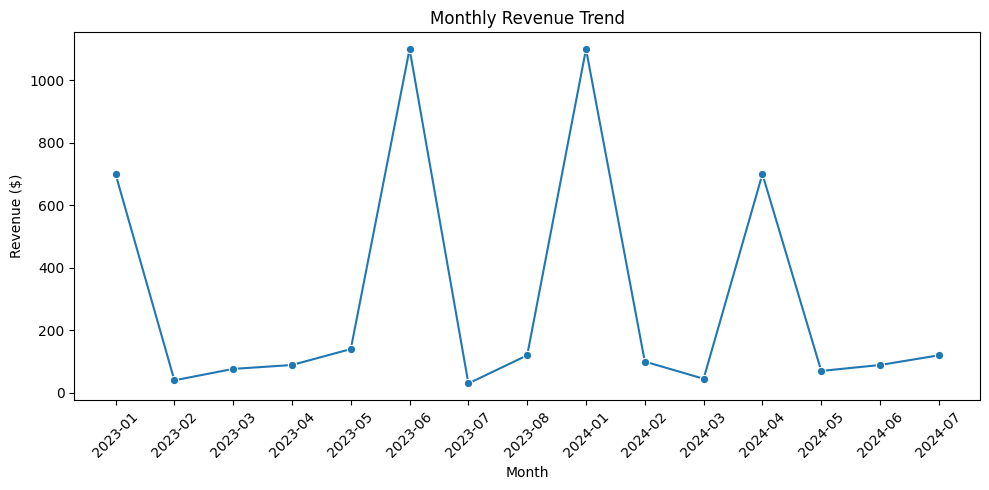

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(data=df_monthly, x='order_month', y='monthly_revenue', marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
# Run the RFM (Recency, Frequency, Monetary) query
rfm_query = """
SELECT
    c.name AS customer_name,
    MAX(o.order_date) AS last_order,
    COUNT(o.order_id) AS frequency,
    ROUND(SUM(p.price * o.quantity), 2) AS monetary_value,
    ROUND((julianday('2024-06-10') - julianday(MAX(o.order_date))), 0) AS recency
FROM Orders o
JOIN Customers c ON o.customer_id = c.customer_id
JOIN Products p ON o.product_id = p.product_id
GROUP BY c.customer_id
ORDER BY recency ASC, frequency DESC, monetary_value DESC
"""

# Execute the SQL query
rfm_df = pd.read_sql_query(rfm_query, conn)

# Show the result
rfm_df.head()


,customer_name,last_order,frequency,monetary_value,recency
0,John Smith,2024-07-03,2,260.00,-23.0
1,Fatima Khan,2024-06-25,2,1188.99,-15.0
2,Carlos Gomez,2024-05-16,2,109.98,25.0
3,Lucas Lima,2024-04-12,2,729.99,59.0
4,Mei Chen,2024-03-22,2,134.00,80.0


In [18]:
top_customers_query = """
WITH customer_sales AS (
    SELECT
        c.customer_id,
        c.name AS customer_name,
        SUM(p.price * o.quantity) AS total_spent
    FROM Orders o
    JOIN Customers c ON o.customer_id = c.customer_id
    JOIN Products p ON o.product_id = p.product_id
    GROUP BY c.customer_id
),
ranked AS (
    SELECT *,
           NTILE(20) OVER (ORDER BY total_spent DESC) AS percentile
    FROM customer_sales
)
SELECT * FROM ranked WHERE percentile = 1
"""

# Run the query
top_customers_df = pd.read_sql_query(top_customers_query, conn)

# Display the result
top_customers_df.head()


,customer_id,customer_name,total_spent,percentile
0,1,Alice Johnson,1799.98,1


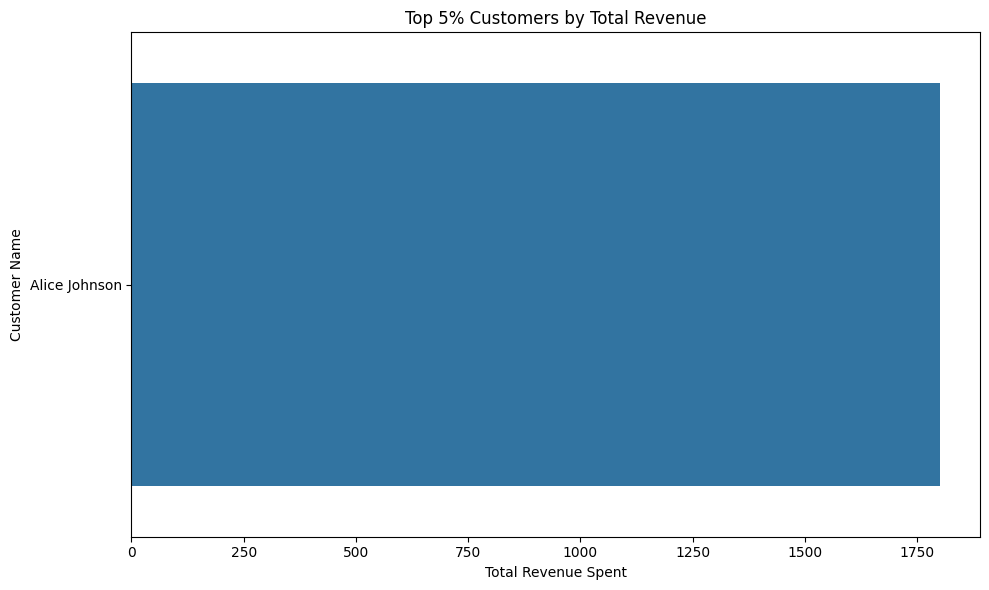

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot top customer spenders
plt.figure(figsize=(10, 6))
sns.barplot(x='total_spent', y='customer_name', data=top_customers_df.sort_values(by='total_spent', ascending=False))
plt.title('Top 5% Customers by Total Revenue')
plt.xlabel('Total Revenue Spent')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()


In [20]:
best_sellers_query = """
SELECT
    cu.country,
    pr.name AS product_name,
    SUM(o.quantity) AS total_quantity_sold,
    ROUND(SUM(o.quantity * pr.price), 2) AS total_revenue
FROM Orders o
JOIN Customers cu ON o.customer_id = cu.customer_id
JOIN Products pr ON o.product_id = pr.product_id
GROUP BY cu.country, pr.product_id
ORDER BY cu.country, total_quantity_sold DESC
"""

# Run the query
best_sellers_df = pd.read_sql_query(best_sellers_query, conn)

# Preview
best_sellers_df.head()


,country,product_name,total_quantity_sold,total_revenue
0,Brazil,Novel,2,30.00
1,Brazil,Smartphone,1,699.99
2,Canada,Face Cream,4,140.00
3,Canada,Microwave,1,120.00
4,China,Novel,3,45.00


In [21]:
# Top 3 products per country
top3_per_country = (
    best_sellers_df
    .sort_values(['country', 'total_quantity_sold'], ascending=[True, False])
    .groupby('country')
    .head(3)
)

top3_per_country


,country,product_name,total_quantity_sold,total_revenue
0,Brazil,Novel,2,30.00
1,Brazil,Smartphone,1,699.99
2,Canada,Face Cream,4,140.00
3,Canada,Microwave,1,120.00
4,China,Novel,3,45.00
5,China,Blender,1,89.00
6,Nigeria,T-shirt,5,99.95
7,Nigeria,Cookbook,3,76.50
8,Pakistan,Laptop,1,1099.99
9,Pakistan,Blender,1,89.00


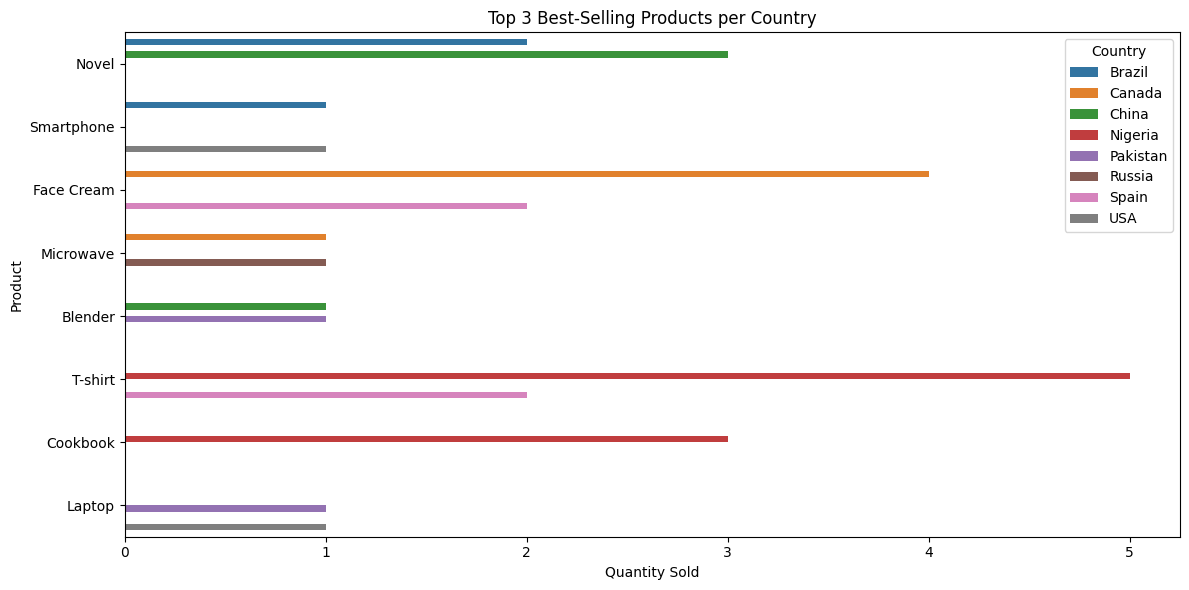

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top3_per_country, x='total_quantity_sold', y='product_name', hue='country')
plt.title('Top 3 Best-Selling Products per Country')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


In [23]:
# Assign RFM scores (1 to 5)
rfm_df['recency_score'] = pd.qcut(rfm_df['recency'], 5, labels=[5,4,3,2,1])
rfm_df['frequency_score'] = pd.qcut(rfm_df['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm_df['monetary_score'] = pd.qcut(rfm_df['monetary_value'], 5, labels=[1,2,3,4,5])


In [24]:
# Create RFM score as string
rfm_df['rfm_score'] = (
    rfm_df['recency_score'].astype(str) +
    rfm_df['frequency_score'].astype(str) +
    rfm_df['monetary_score'].astype(str)
)


In [25]:
def segment_customer(row):
    r = int(row['recency_score'])
    f = int(row['frequency_score'])
    m = int(row['monetary_score'])

    if r >= 4 and f >= 4 and m >= 4:
        return 'Champion'
    elif r >= 3 and f >= 3:
        return 'Loyal Customer'
    elif r == 5 and f <= 2:
        return 'Potential Loyalist'
    elif r <= 2 and f >= 4:
        return 'At Risk'
    elif r == 1 and f == 1:
        return 'Lost'
    else:
        return 'Others'

# Apply segmentation
rfm_df['segment'] = rfm_df.apply(segment_customer, axis=1)
rfm_df[['customer_name', 'recency', 'frequency', 'monetary_value', 'segment']].head()


,customer_name,recency,frequency,monetary_value,segment
0,John Smith,-23.0,2,260.00,Potential Loyalist
1,Fatima Khan,-15.0,2,1188.99,Potential Loyalist
2,Carlos Gomez,25.0,2,109.98,Loyal Customer
3,Lucas Lima,59.0,2,729.99,Loyal Customer
4,Mei Chen,80.0,2,134.00,Loyal Customer


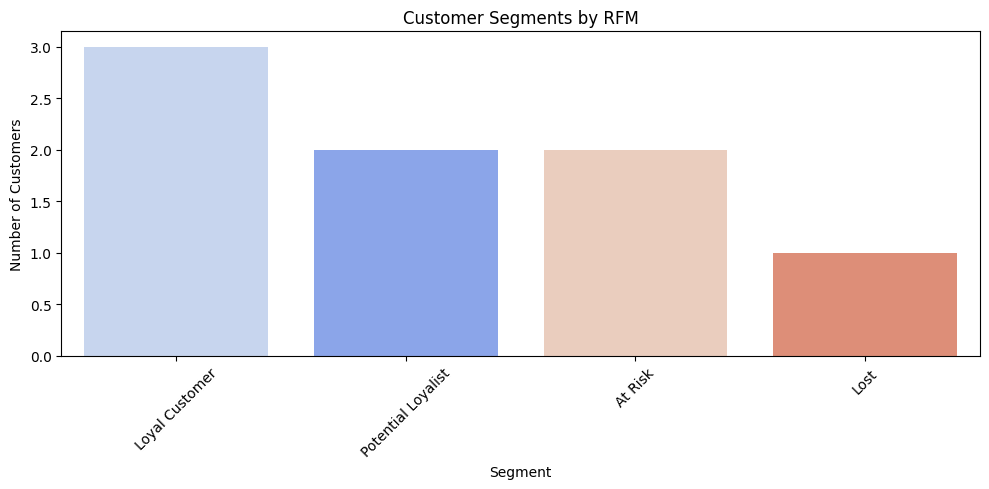

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(
    data=rfm_df,
    x='segment',
    hue='segment',           # Explicitly assigning hue
    order=rfm_df['segment'].value_counts().index,
    palette='coolwarm',
    legend=False             # Optional: hide duplicate legend
)
plt.title('Customer Segments by RFM')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
churn_query = """
SELECT
    c.customer_id,
    c.name AS customer_name,
    MAX(o.order_date) AS last_order_date,
    ROUND(julianday('2024-06-10') - julianday(MAX(o.order_date)), 0) AS days_since_last_order
FROM Orders o
JOIN Customers c ON o.customer_id = c.customer_id
GROUP BY c.customer_id
"""

churn_df = pd.read_sql_query(churn_query, conn)
churn_df.head()


,customer_id,customer_name,last_order_date,days_since_last_order
0,1,Alice Johnson,2024-01-10,152.0
1,2,Carlos Gomez,2024-05-16,25.0
2,3,Aisha Bello,2024-02-14,117.0
3,4,Mei Chen,2024-03-22,80.0
4,5,John Smith,2024-07-03,-23.0


In [29]:
# Define churn status
churn_df['churn_status'] = churn_df['days_since_last_order'].apply(
    lambda x: 'Churned' if x > 180 else 'Active'
)
churn_df.head()


,customer_id,customer_name,last_order_date,days_since_last_order,churn_status
0,1,Alice Johnson,2024-01-10,152.0,Active
1,2,Carlos Gomez,2024-05-16,25.0,Active
2,3,Aisha Bello,2024-02-14,117.0,Active
3,4,Mei Chen,2024-03-22,80.0,Active
4,5,John Smith,2024-07-03,-23.0,Active


<ipython-input-30-4229271550>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_df, x='churn_status', palette='Set2')


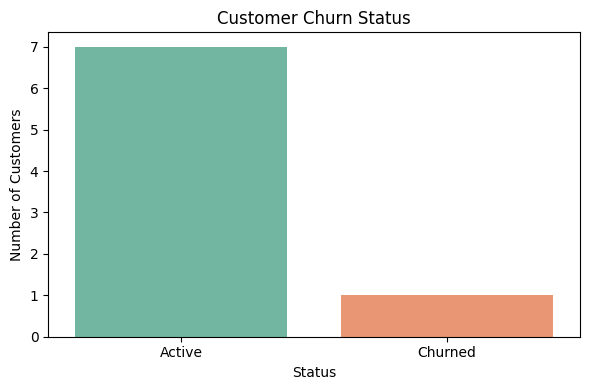

In [30]:
plt.figure(figsize=(6, 4))
sns.countplot(data=churn_df, x='churn_status', palette='Set2')
plt.title('Customer Churn Status')
plt.xlabel('Status')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


In [31]:
conn.execute("""
CREATE VIEW rfm_view AS
SELECT
    c.customer_id,
    c.name AS customer_name,
    MAX(o.order_date) AS last_order,
    COUNT(o.order_id) AS frequency,
    ROUND(SUM(p.price * o.quantity), 2) AS monetary_value,
    ROUND((julianday('2024-06-10') - julianday(MAX(o.order_date))), 0) AS recency
FROM Orders o
JOIN Customers c ON o.customer_id = c.customer_id
JOIN Products p ON o.product_id = p.product_id
GROUP BY c.customer_id
""")


In [32]:
conn.execute("""
CREATE VIEW churn_view AS
SELECT
    c.customer_id,
    c.name AS customer_name,
    MAX(o.order_date) AS last_order_date,
    ROUND(julianday('2024-06-10') - julianday(MAX(o.order_date)), 0) AS days_since_last_order,
    CASE
        WHEN ROUND(julianday('2024-06-10') - julianday(MAX(o.order_date)), 0) > 180 THEN 'Churned'
        ELSE 'Active'
    END AS churn_status
FROM Orders o
JOIN Customers c ON o.customer_id = c.customer_id
GROUP BY c.customer_id
""")


In [33]:
conn.execute("""
CREATE VIEW sales_summary_view AS
SELECT
    o.country,
    p.name AS product_name,
    SUM(o.quantity) AS total_units_sold,
    ROUND(SUM(o.quantity * p.price), 2) AS total_revenue
FROM Orders o
JOIN Products p ON o.product_id = p.product_id
GROUP BY o.country, p.name
""")


<ipython-input-36-107733649>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_sales, x='country', y='revenue', palette='crest')


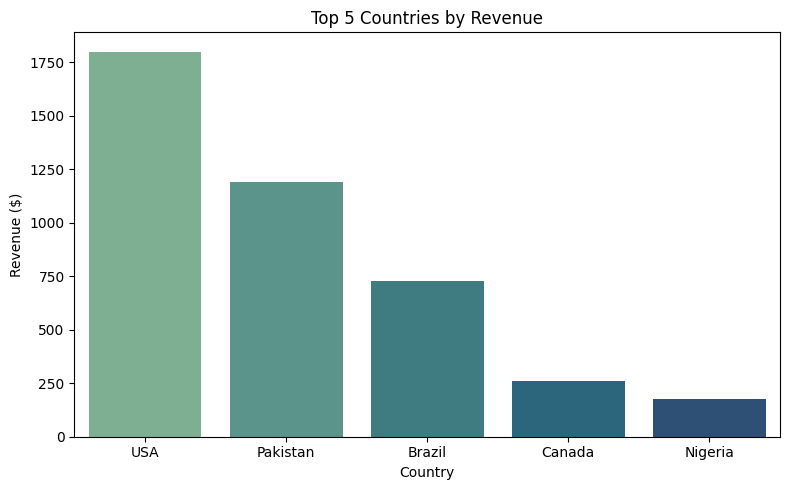

In [36]:
country_sales = pd.read_sql_query("""
    SELECT c.country,
           ROUND(SUM(p.price * o.quantity), 2) AS revenue
    FROM Orders o
    JOIN Products p ON o.product_id = p.product_id
    JOIN Customers c ON o.customer_id = c.customer_id
    GROUP BY c.country
    ORDER BY revenue DESC
    LIMIT 5
""", conn)

plt.figure(figsize=(8, 5))
sns.barplot(data=country_sales, x='country', y='revenue', palette='crest')
plt.title('Top 5 Countries by Revenue')
plt.ylabel('Revenue ($)')
plt.xlabel('Country')
plt.tight_layout()
plt.show()


<ipython-input-37-1833958341>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='product', y='total_sold', palette='flare')


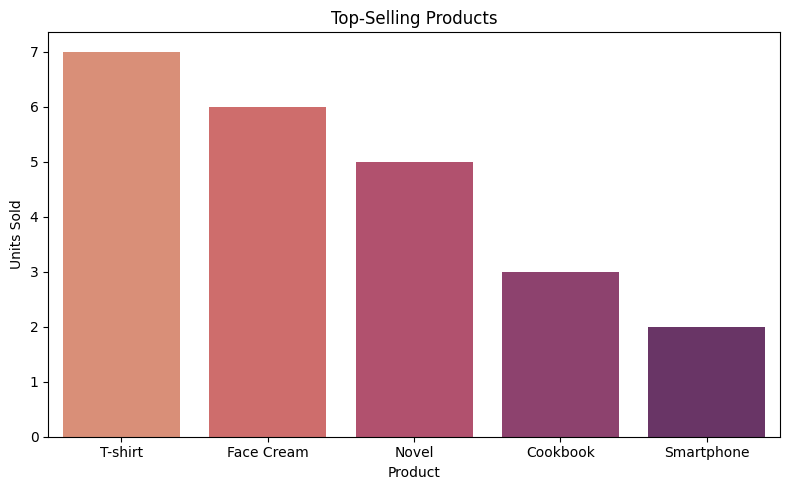

In [37]:
top_products = pd.read_sql_query("""
    SELECT p.name AS product,
           SUM(o.quantity) AS total_sold
    FROM Orders o
    JOIN Products p ON o.product_id = p.product_id
    GROUP BY p.name
    ORDER BY total_sold DESC
    LIMIT 5
""", conn)

plt.figure(figsize=(8, 5))
sns.barplot(data=top_products, x='product', y='total_sold', palette='flare')
plt.title('Top-Selling Products')
plt.ylabel('Units Sold')
plt.xlabel('Product')
plt.tight_layout()
plt.show()


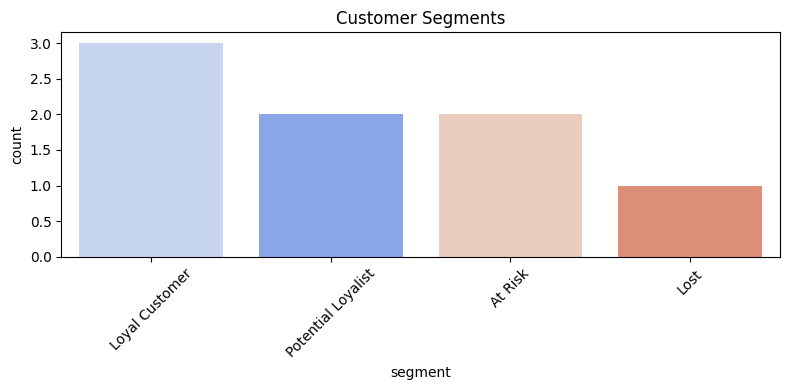

In [38]:
plt.figure(figsize=(8, 4))
sns.countplot(data=rfm_df, x='segment', order=rfm_df['segment'].value_counts().index, hue='segment', palette='coolwarm', legend=False)
plt.title('Customer Segments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-39-743300694>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_df, x='churn_status', palette='Set2')


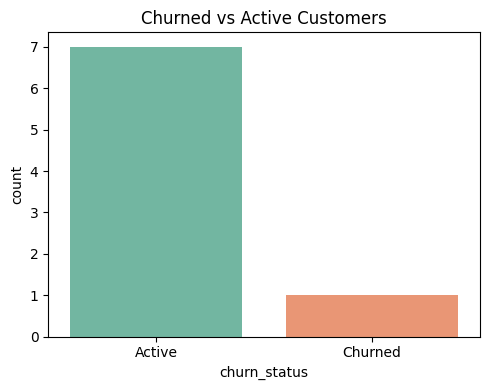

In [39]:
plt.figure(figsize=(5, 4))
sns.countplot(data=churn_df, x='churn_status', palette='Set2')
plt.title('Churned vs Active Customers')
plt.tight_layout()
plt.show()
